In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('ggplot')

# About the Data

The 'Revenue' attribute is used as the class label. 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [476]:
df = pd.read_csv('online_shoppers_intention.csv')

In [477]:
# take a look at the data
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [473]:
# Descriptive statistics
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330,NaN,NaN,NaN,2.3178,3.32087,0,0,1,4,27
Administrative_Duration,12330,NaN,NaN,NaN,80.9062,176.76,-1,0,8,93.2562,3398.75
Informational,12330,NaN,NaN,NaN,0.503979,1.26998,0,0,0,0,24
Informational_Duration,12330,NaN,NaN,NaN,34.5064,140.746,-1,0,0,0,2549.38
ProductRelated,12330,NaN,NaN,NaN,31.7639,44.4651,0,7,18,38,705
ProductRelated_Duration,12330,NaN,NaN,NaN,1196.04,1913.29,-1,185.287,601.06,1464.16,63973.5
BounceRates,12330,NaN,NaN,NaN,0.0221525,0.0483996,0,0,0.003125,0.0169412,0.2
ExitRates,12330,NaN,NaN,NaN,0.0430025,0.0484997,0,0.0142857,0.0251564,0.05,0.2
PageValues,12330,NaN,NaN,NaN,5.88926,18.5684,0,0,0,0,361.764
SpecialDay,12330,NaN,NaN,NaN,0.0614274,0.198917,0,0,0,0,1


In [5]:
# check missing values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Not many missing values, will impute it with mean

In [6]:
# df.apply(lambda x, x.fillna(x.mean()), axis=0)
df.fillna(df.mean(), inplace=True)

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Weekend']=labelencoder.fit_transform(df['Weekend'])
df['Revenue']=labelencoder.transform(df['Revenue'])

In [11]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [13]:
num_columns =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

print(range(len(num_columns)))

range(0, 10)


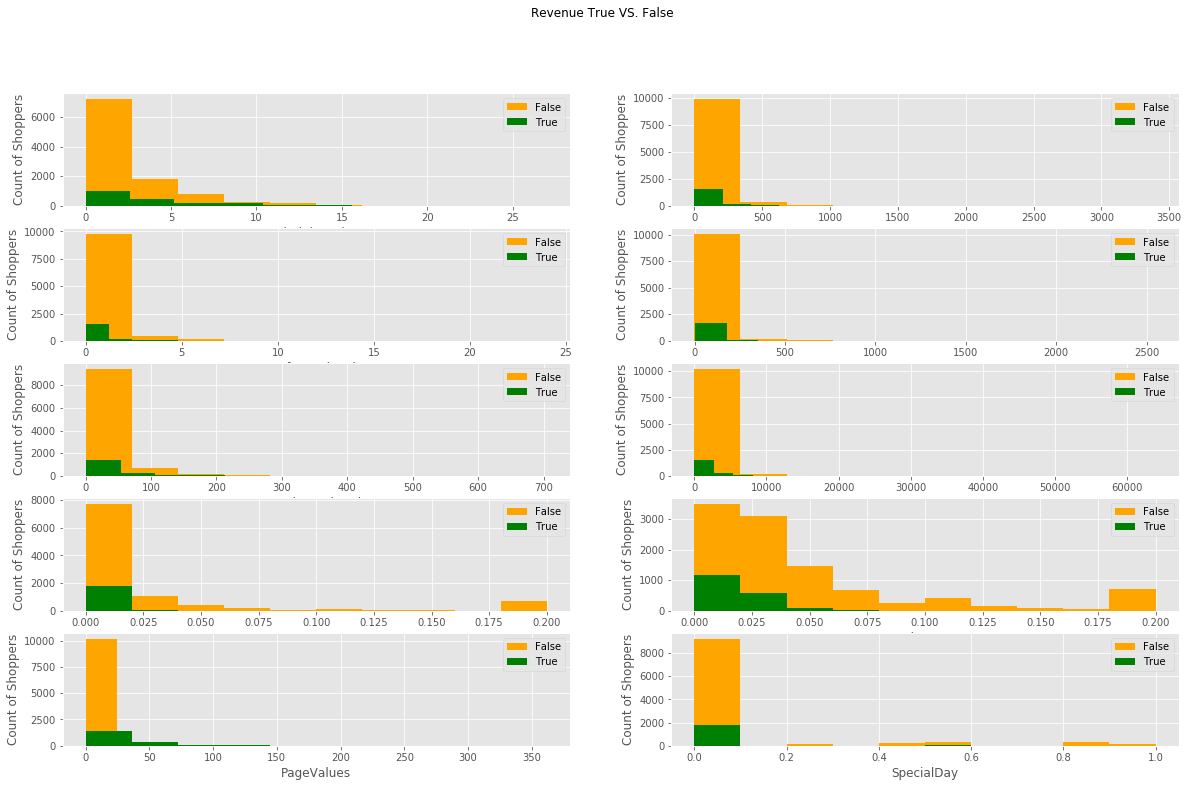

In [474]:
fig, ax = plt.subplots(nrows=5,ncols=2, figsize=(20,12))

s=0
for i in range(5):
    for j in range(2):
        ax[i,j].hist(df[df['Revenue']==0][num_columns[s]], color='orange', label='False')
        ax[i,j].hist(df[df['Revenue']==1][num_columns[s]], color='green', label='True')
        ax[i,j].set_xlabel(num_columns[s])
        ax[i,j].set_ylabel('Count of Shoppers')
        fig.suptitle('Revenue True VS. False')
        ax[i,j].legend()
        s =s + 1
plt.show()

In [481]:
num_df = df[num_columns]
num_df.corr().round(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
Administrative,1.000,0.601,0.377,0.256,0.431,0.374,-0.223,-0.316,0.099,-0.095
Administrative_Duration,0.601,1.000,0.303,0.238,0.289,0.355,-0.144,-0.206,0.067,-0.073
Informational,0.377,0.303,1.000,0.619,0.374,0.387,-0.116,-0.164,0.049,-0.048
Informational_Duration,0.256,0.238,0.619,1.000,0.280,0.347,-0.074,-0.105,0.031,-0.031
ProductRelated,0.431,0.289,0.374,0.280,1.000,0.861,-0.204,-0.292,0.056,-0.024
ProductRelated_Duration,0.374,0.355,0.387,0.347,0.861,1.000,-0.184,-0.252,0.053,-0.037
BounceRates,-0.223,-0.144,-0.116,-0.074,-0.204,-0.184,1.000,0.913,-0.119,0.073
ExitRates,-0.316,-0.206,-0.164,-0.105,-0.292,-0.252,0.913,1.000,-0.174,0.103
PageValues,0.099,0.067,0.049,0.031,0.056,0.053,-0.119,-0.174,1.000,-0.064
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.037,0.073,0.103,-0.064,1.000


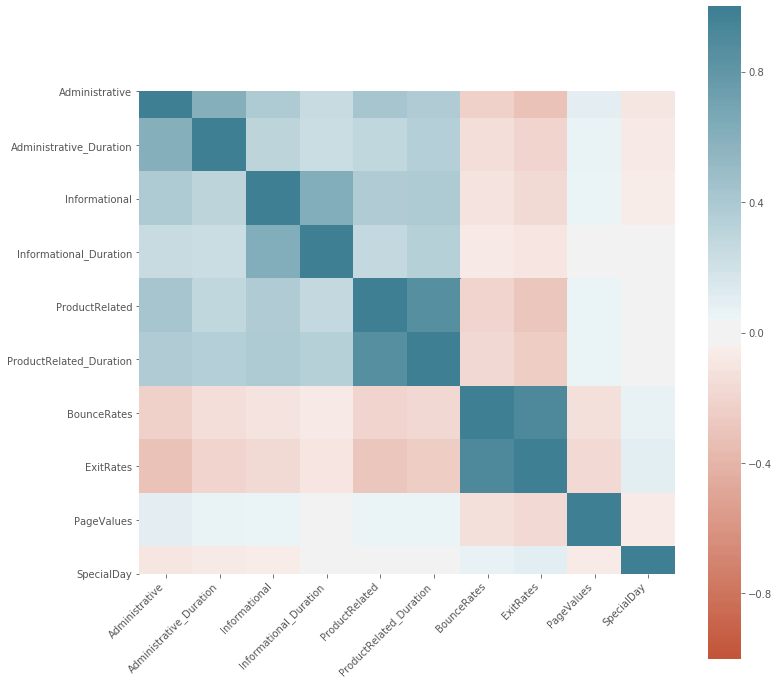

In [482]:
corr = num_df.corr()
fig, ax =plt.subplots(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the heatmap, we can see that some types of web session visit duration have a moderate correlation with the number of types of the session visited.

In [17]:
for i in range(len(num_columns)):
    print(num_columns[i])
    print(df.groupby(['Revenue'])[num_columns[i]].mean())
    print()

Administrative
Revenue
0    2.120845
1    3.393606
Name: Administrative, dtype: float64

Administrative_Duration
Revenue
0     73.843708
1    119.483244
Name: Administrative_Duration, dtype: float64

Informational
Revenue
0    0.452318
1    0.786164
Name: Informational, dtype: float64

Informational_Duration
Revenue
0    30.276449
1    57.611427
Name: Informational_Duration, dtype: float64

ProductRelated
Revenue
0    28.752993
1    48.210168
Name: ProductRelated, dtype: float64

ProductRelated_Duration
Revenue
0    1071.514965
1    1876.209615
Name: ProductRelated_Duration, dtype: float64

BounceRates
Revenue
0    0.025271
1    0.005117
Name: BounceRates, dtype: float64

ExitRates
Revenue
0    0.047295
1    0.019555
Name: ExitRates, dtype: float64

PageValues
Revenue
0     1.975998
1    27.264518
Name: PageValues, dtype: float64

SpecialDay
Revenue
0    0.068432
1    0.023166
Name: SpecialDay, dtype: float64



In [485]:
cat_columns = ['Month','OperatingSystems', 
               'Browser', 'Region', 'TrafficType', 
               'VisitorType','Weekend']

In [486]:
for i in range(len(cat_columns)):
    print(cat_columns[i])
    print(pd.crosstab( df[cat_columns[i]],df['Revenue']))
    print()

Month
Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86

OperatingSystems
Revenue           False  True 
OperatingSystems              
1                  2206    379
2                  5446   1155
3                  2287    268
4                   393     85
5                     5      1
6                    17      2
7                     6      1
8                    62     17

Browser
Revenue  False  True 
Browser              
1         2097    365
2         6738   1223
3          100      5
4          606    130
5          381     86
6          154     20
7           43      6
8          114     21
9            1      0
10         131     32
11           5      1
12           7      3
13          45     16

Region
Revenue  False  True 
Region               
1         4

### 

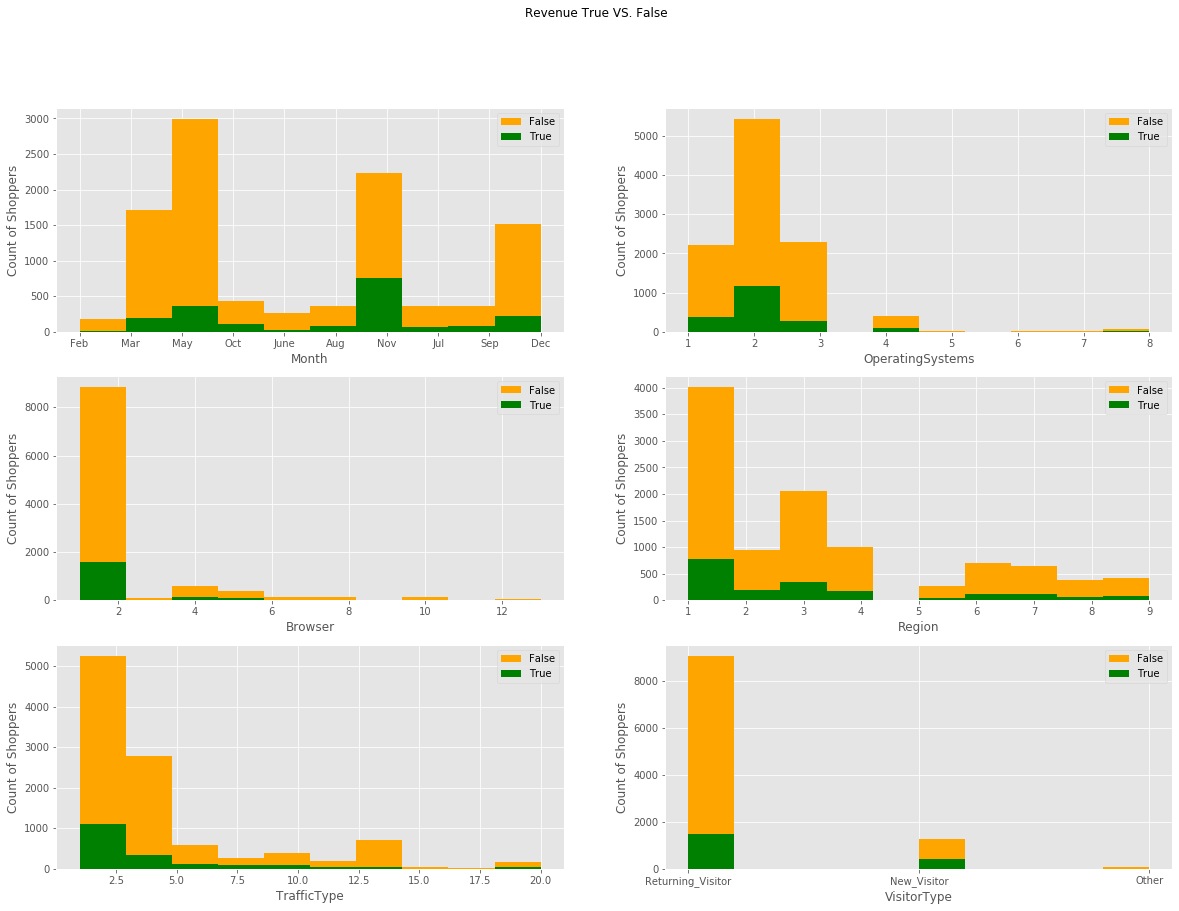

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

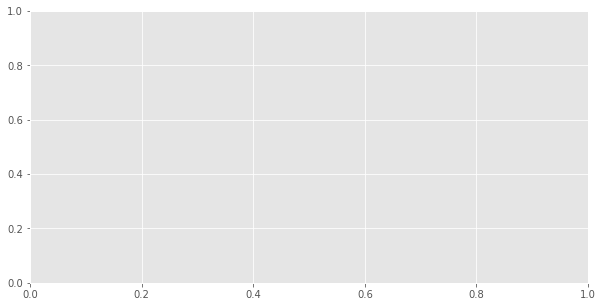

In [489]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(20,14))

s=0
for i in range(3):
    for j in range(2):
        ax[i,j].hist(df[df['Revenue']==0][cat_columns[s]], color='orange', label='False')
        ax[i,j].hist(df[df['Revenue']==1][cat_columns[s]], color='green', label='True')
        ax[i,j].set_xlabel(cat_columns[s])
        ax[i,j].set_ylabel('Count of Shoppers')
        fig.suptitle('Revenue True VS. False')
        ax[i,j].legend()
        s =s + 1
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(df[df['Revenue']==0]['Weekend'], color='orange', label='False')
plt.hist(df[df['Revenue']==1]['Weekend'], color='green', label='True')
plt.xlabel(cat_columns[6])
plt.ylabel('Count of Shoppers')
plt.legend()
plt.show()

## Encode the Categorical Aariables Using Target Mean Encoding

In [205]:
# conda install -c conda-forge category_encoders

In [219]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=cat_columns[:-1])
df_te = df.copy()
target_encoder.fit(df_te[cat_columns[:-1]], df_te['Revenue'])
df_=target_encoder.transform(df_te[cat_columns[:-1]], df_te['Revenue'])
df_te = df_te.drop(cat_columns[:-1], axis=1)
df_te = pd.concat([df_te, df_], axis=1)

In [224]:
X = df_te.drop(['Revenue'], axis=1)
y = df_te['Revenue']

In [267]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler, RobustScaler, power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve


In [229]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [277]:
def metrics(y_true, y_pred):
    print('Confusion Matrix: ', '\n', confusion_matrix(y_true, y_pred), '\n')
    print('Classification Report:', '\n', classification_report(y_true, y_pred), '\n')
    print('F1 Score:  ',  f1_score(y_true, y_pred).round(3), '\n')
    print('ROC_AUC Score: ', roc_auc_score(y_true, y_pred).round(3))

def roc_curve_disp(model, X_test, y_test):
    ax=plt.gca()
    model_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
    plt.show()

Confusion Matrix:  
 [[2522   70]
 [ 307  184]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      2592
           1       0.72      0.37      0.49       491

    accuracy                           0.88      3083
   macro avg       0.81      0.67      0.71      3083
weighted avg       0.86      0.88      0.86      3083
 

F1 Score:   0.494 

ROC_AUC Score:  0.674
None


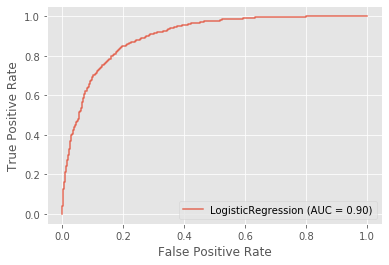

In [278]:
# base model:
lr = LogisticRegression(solver='liblinear')
base_model = lr.fit(X_train, y_train)

y_pred = base_model.predict(X_test)

print(metrics(y_test, y_pred))

roc_curve_disp(base_model, X_test, y_test)
# print('Confusion Matrix:', '\n', confusion_matrix(y_test, base_model.predict(X_test)), '\n')
# print('Classification Report:', '\n', classification_report(y_test, base_model.predict(X_test)), '\n')
# print('F1 Score:', '\n', f1_score(y_test, base_model.predict(X_test)), '\n')
# print('ROC_AUC Score:', '\n', roc_auc_score(y_test,base_model.predict(X_test)))

In [286]:
# No data normalization or transformation
estimators = [  
              ('rf', RandomForestClassifier(n_estimators = 100)),
              ('grad', GradientBoostingClassifier()),
              ('xgb', XGBClassifier())]
stack = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(), cv = 5)
stack.fit(X_train, y_train);

Confusion Matrix:  
 [[2482  110]
 [ 216  275]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2592
           1       0.71      0.56      0.63       491

    accuracy                           0.89      3083
   macro avg       0.82      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.628 

ROC_AUC Score:  0.759
None


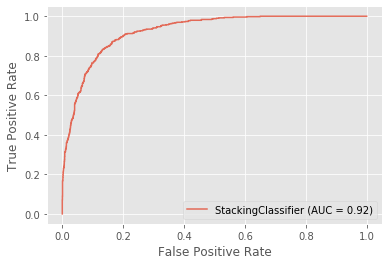

In [287]:
print(metrics(y_test, stack.predict(X_test)))
roc_curve_disp(stack, X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion Matrix:  
 [[2479  113]
 [ 226  265]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2592
           1       0.70      0.54      0.61       491

    accuracy                           0.89      3083
   macro avg       0.81      0.75      0.77      3083
weighted avg       0.88      0.89      0.88      3083
 

F1 Score:   0.61 

ROC_AUC Score:  0.748


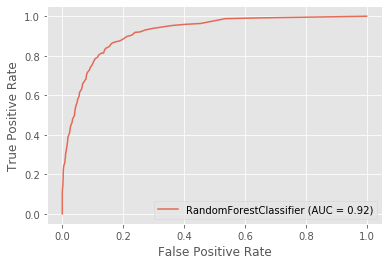

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Confusion Matrix:  
 [[2460  132]
 [ 210  281]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2592
           1       0.68      0.57      0.62       491

    accuracy                           0.89      3083
   macro a

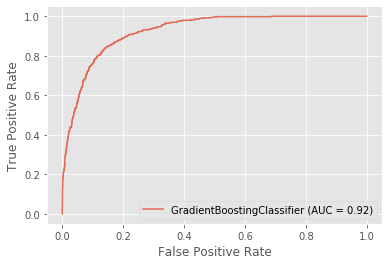

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Confusion Matrix:  
 [[2472  120]
 [ 210  281]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2592
           1       0.70      0.57      0.63       491

    accuracy                           0.89      3083
   macro avg       0.81      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.63 

ROC_AUC Score:  0.763


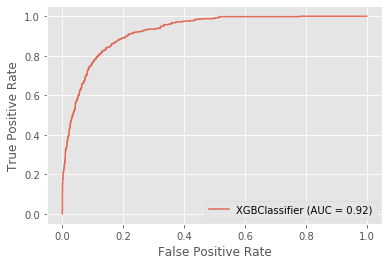

In [288]:
for i in stack.estimators_:
    print(i)
    metrics(y_test, i.predict(X_test))
    roc_curve_disp(i, X_test, y_test)
    

XGBoost outperformed on all models. Thereafter, will select XGBoost as the model to tune.

In [289]:
# transform X:
from sklearn.pipeline import Pipeline

In [316]:
ss = StandardScaler()
rs = RobustScaler() 

In [317]:
xgb = XGBClassifier()

In [318]:
pipe = Pipeline([('scaler', ss), ('xgb', xgb)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('xgb', xgb)])
metrics(y_test, pipe.predict(X_test))

Confusion Matrix:  
 [[2472  120]
 [ 210  281]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2592
           1       0.70      0.57      0.63       491

    accuracy                           0.89      3083
   macro avg       0.81      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.63 

ROC_AUC Score:  0.763


In [319]:
pipe1 = Pipeline([('scaler', rs), ('xgb', xgb)])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe1.fit(X_train, y_train)
metrics(y_test, pipe1.predict(X_test))

Confusion Matrix:  
 [[2472  120]
 [ 210  281]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2592
           1       0.70      0.57      0.63       491

    accuracy                           0.89      3083
   macro avg       0.81      0.76      0.78      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.63 

ROC_AUC Score:  0.763


In [324]:
negative_examples = 10422
positive_examples = 1908
scale_pos_weight = np.sqrt(negative_examples/positive_examples) 

In [320]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [325]:
xgb = XGBClassifier(max_depth=5,
n_estimators=200,
scale_pos_weight=scale_pos_weight)

In [329]:
model = xgb.fit(X_train, y_train)

print(metrics(y_train, model.predict(X_train)))
print(metrics(y_test, model.predict(X_test)))


Confusion Matrix:  
 [[7594  236]
 [ 132 1285]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      7830
           1       0.84      0.91      0.87      1417

    accuracy                           0.96      9247
   macro avg       0.91      0.94      0.93      9247
weighted avg       0.96      0.96      0.96      9247
 

F1 Score:   0.875 

ROC_AUC Score:  0.938
None
Confusion Matrix:  
 [[2399  193]
 [ 161  330]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      2592
           1       0.63      0.67      0.65       491

    accuracy                           0.89      3083
   macro avg       0.78      0.80      0.79      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.651 

ROC_AUC Score:  0.799
None


In [330]:
xgb = XGBClassifier(max_depth=5,
n_estimators=200,
scale_pos_weight=scale_pos_weight)

In [331]:
import tensorflow as tf

In [332]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import AUC

In [394]:
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

auc = AUC()
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[auc])

In [412]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [415]:
history = model.fit(X_train, y_train, 
          epochs=200, 
          verbose=1,
          validation_data=(X_test,y_test)
         )

Train on 9247 samples, validate on 3083 samples
Epoch 1/200
9247/9247 [==============================] - 0s 38us/sample - loss: 0.4131 - auc: 0.5725 - val_loss: 0.4049 - val_auc: 0.7793
Epoch 2/200
9247/9247 [==============================] - 0s 38us/sample - loss: 0.4155 - auc: 0.5642 - val_loss: 0.4052 - val_auc: 0.7794
Epoch 3/200
9247/9247 [==============================] - 0s 37us/sample - loss: 0.4140 - auc: 0.5665 - val_loss: 0.4045 - val_auc: 0.7817
Epoch 4/200
9247/9247 [==============================] - 0s 37us/sample - loss: 0.4134 - auc: 0.5700 - val_loss: 0.4045 - val_auc: 0.7816
Epoch 5/200
9247/9247 [==============================] - 0s 37us/sample - loss: 0.4126 - auc: 0.5701 - val_loss: 0.4036 - val_auc: 0.7821
Epoch 6/200
9247/9247 [==============================] - 0s 38us/sample - loss: 0.4140 - auc: 0.5702 - val_loss: 0.4035 - val_auc: 0.7819
Epoch 7/200
9247/9247 [==============================] - 0s 37us/sample - loss: 0.4141 - auc: 0.5736 - val_loss: 0.4034 - va

In [417]:
score = roc_auc_score(y_test, model.predict(X_test))
print('ROC AUC: %.3f' % score)

ROC AUC: 0.855


(array([ 292.,  398.,  285.,  218.,  197.,  141.,  151.,  141.,  176.,
        1084.]),
 array([0.00736822, 0.02659477, 0.04582131, 0.06504785, 0.0842744 ,
        0.10350094, 0.12272748, 0.14195402, 0.16118057, 0.1804071 ,
        0.19963366], dtype=float32),
 <a list of 10 Patch objects>)

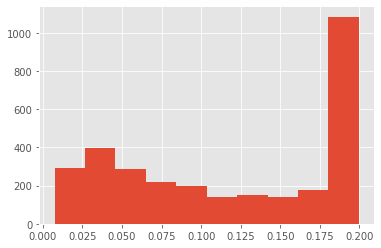

In [422]:
y_pred = model.predict(X_test)
plt.hist(y_pred)

In [411]:
yhat = pd.DataFrame(yhat)
yhat[0].value_counts()

0.154824    2661
0.154305     236
0.132009       4
0.131278       3
0.131517       3
            ... 
0.134392       1
0.129499       1
0.129484       1
0.132406       1
0.068052       1
Name: 0, Length: 173, dtype: int64

In [377]:
y_test.value_counts()

0    2592
1     491
Name: Revenue, dtype: int64

In [423]:
weights = {0:1, 1:6}
history1 = model.fit(X_train, y_train, 
          class_weight=weights,
          epochs=200, 
          verbose=1,
          validation_data=(X_test,y_test)
         )

W1023 13:51:21.715785 4547440064 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']
W1023 13:51:21.739992 4547440064 data_adapter.py:1091] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train on 9247 samples, validate on 3083 samples
Epoch 1/200
9247/9247 [==============================] - 1s 93us/sample - loss: 1.3374 - auc: 0.6344 - val_loss: 1.1251 - val_auc: 0.8125
Epoch 2/200
9247/9247 [==============================] - 0s 38us/sample - loss: 1.1250 - auc: 0.6360 - val_loss: 1.0297 - val_auc: 0.8239
Epoch 3/200
9247/9247 [==============================] - 0s 39us/sample - loss: 1.1170 - auc: 0.6451 - val_loss: 1.0067 - val_auc: 0.8439
Epoch 4/200
9247/9247 [==============================] - 0s 36us/sample - loss: 1.0937 - auc: 0.6450 - val_loss: 0.9816 - val_auc: 0.8438
Epoch 5/200
9247/9247 [==============================] - 0s 37us/sample - loss: 1.0921 - auc: 0.6461 - val_loss: 0.9686 - val_auc: 0.8469
Epoch 6/200
9247/9247 [==============================] - 0s 37us/sample - loss: 1.0996 - auc: 0.6413 - val_loss: 0.9657 - val_auc: 0.8476
Epoch 7/200
9247/9247 [==============================] - 0s 38us/sample - loss: 1.1034 - auc: 0.6449 - val_loss: 0.9802 - va

In [491]:
score1 = roc_auc_score(y_test, model.predict(X_test))
score2 = roc_auc_score(y_test, model.predict_classes(X_test))
print('ROC AUC: %.3f' % score1)
print('ROC AUC: %.3f' % score2)
print('F1 Score: %.3f' % f1_score(y_test, model.predict_classes(X_test)))

ROC AUC: 0.901
ROC AUC: 0.819
F1 Score: 0.536


In [430]:
y_pred = model.predict_classes(X_test)

In [431]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [432]:
metrics(y_test, y_pred)

Confusion Matrix:  
 [[1836  756]
 [  35  456]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.71      0.82      2592
           1       0.38      0.93      0.54       491

    accuracy                           0.74      3083
   macro avg       0.68      0.82      0.68      3083
weighted avg       0.88      0.74      0.78      3083
 

F1 Score:   0.536 

ROC_AUC Score:  0.819


In [433]:
estimators = [  
              ('rf', RandomForestClassifier(n_estimators = 200, class_weight='balanced')),
              ('grad', GradientBoostingClassifier(n_estimators=200)),
              ('xgb', XGBClassifier(scale_pos_weight=scale_pos_weight))]
stack = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(), cv = 5)
stack.fit(X_train, y_train);

In [434]:
metrics(y_test, stack.predict(X_test))

Confusion Matrix:  
 [[2449  143]
 [ 193  298]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2592
           1       0.68      0.61      0.64       491

    accuracy                           0.89      3083
   macro avg       0.80      0.78      0.79      3083
weighted avg       0.89      0.89      0.89      3083
 

F1 Score:   0.639 

ROC_AUC Score:  0.776


In [453]:
y_pred_nn = model.predict_classes(X_test)
y_pred_stack = stack.predict(X_test)

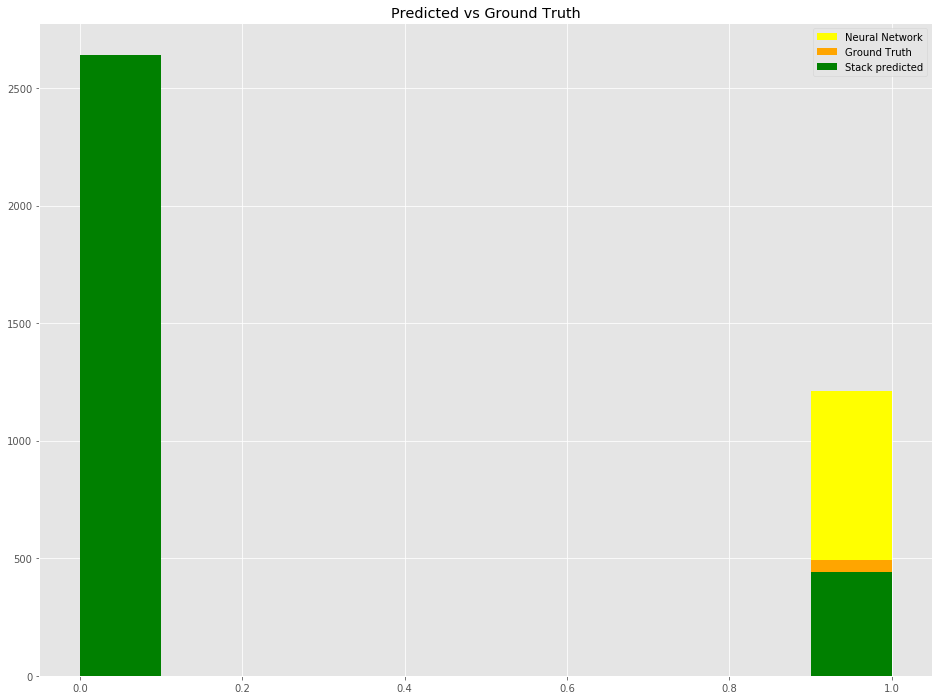

In [472]:
y_pred_nn = model.predict_classes(X_test)
y_pred_stack = stack.predict(X_test)

fig, ax=plt.subplots(figsize=(16,12))
plt.hist(y_pred_nn, color='yellow', label='Neural Network', stacked=True)
plt.hist(y_test, color = 'orange', label = 'Ground Truth', stacked=True)
plt.hist(y_pred_stack, color='green', label='Stack predicted', stacked=True)
plt.title('Predicted vs Ground Truth')
plt.legend()
plt.show()
# plt.hist(y_test)
# plt.title('Ground Truth')
# plt.show()

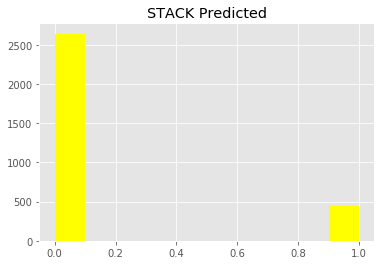

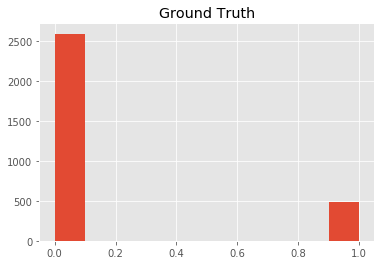

In [451]:
y_pred = stack.predict(X_test)

plt.hist(y_pred, color='yellow')
plt.title('STACK Predicted')
plt.show()
plt.hist(y_test)
plt.title('Ground Truth')
plt.show()